In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import scipy.optimize as opt
import math

In [18]:
data = pd.read_csv(r"C:\Users\nbw36\Downloads\PCIT_Counter1.csv")
data.head(10)

,Time,Counts
0,0 0 5 2 1,0 0 0 0 6 1
1,0 0 5 2 2,0 0 0 0 8 1
2,0 0 5 2 3,0 0 0 0 7 0
3,0 0 5 2 4,0 0 0 0 8 8
4,0 0 5 2 5,0 0 0 0 6 7
5,0 0 5 2 6,0 0 0 0 6 7
6,0 0 5 2 7,0 0 0 0 7 7
7,0 0 5 2 8,0 0 0 0 7 4
8,0 0 5 2 9,0 0 0 0 7 3
9,0 0 5 3 0,0 0 0 0 7 9


In [19]:
c = data['Counts']
counts = []
for j in range(len(c)):
    counts.append(int(c[j][1::2])) #getting rid of spaces and turning string into a number

In [20]:
def gaussian(x, mean, std, A):
    return A * np.exp(-(x-mean)**2/(2*std**2)) #equation of a Gaussian function to be used for fitting

36 97 [35 38 41 44 47 50 53 56 59 62 65 68 71 74 77 80 83 86 89 92 95 98]
70.0 70.3764367816092
8.29953261994945 -8.35641222236623
[ 70.98259902  -8.35641222 149.82106685]
[[ 3.59824715e-02 -5.39339834e-06 -4.40747451e-05]
 [-5.39339834e-06  3.59986970e-02  3.22693265e-01]
 [-4.40747451e-05  3.22693265e-01  8.67553651e+00]]


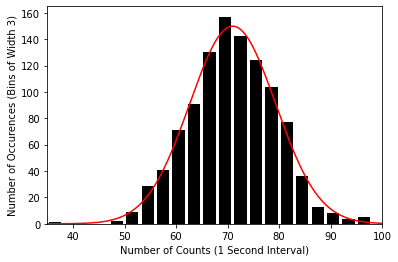

In [23]:
bin5 = np.arange(35, 100, 3)
print(np.min(counts), np.max(counts), bin5)
print(np.median(counts), np.mean(counts))
y = plt.hist(counts, bins=bin5, rwidth=0.8, color='k')[0]
x = bin5[0:-1] + 1.5 #center of each bin
mean = np.mean(counts)
std = np.std(counts)
p,c = opt.curve_fit(gaussian, x, y, p0=(mean, std, 1))
X = np.linspace(35, 100, 10000)
plt.plot(X, gaussian(X, *p), color='r')
plt.xlim(35, 100)
plt.xlabel('Number of Counts (1 Second Interval)')
plt.ylabel('Number of Occurences (Bins of Width 3)')
print(std, p[1])
print(p)
print(c)
plt.savefig('Poisson Distribution', dpi=300)

In [6]:
diff = pd.read_csv(r"C:\Users\nbw36\Downloads\Da numbers for exp. 1 - Sheet1.csv")
diff.head(10)

,mm (.1 inc.),V,pBO,pFSO,pNSO,pBO2
0,3.0,0.479,119,132,96,250
1,3.1,0.565,99,194,90,188
2,3.2,0.744,58,181,93,96
3,3.3,0.682,47,206,107,99
4,3.4,0.407,89,186,114,216
5,3.5,0.122,159,194,122,369
6,3.6,0.101,150,193,147,394
7,3.7,0.344,112,181,124,298
8,3.8,0.801,58,208,154,144
9,3.9,1.134,54,215,166,116


In [7]:
def double(x, A, a, lam, psi, psi2, b):
    alpha = np.pi * a / lam * (x+psi)
    beta = np.pi * 0.45 / lam * (x+psi2)
    return A * np.cos(beta)**2 * (np.sin(alpha) / x)**2 + b #equation of double slit interference pattern

def single(x, A, a, psi, b):
    return A * (np.sin(np.pi*a*(x+psi)) / x)**2 + b

def single2(x, A, a, psi, b):
    return 10*A * (np.sin(np.pi*a*(x+psi)) / x)**2 + b

In [8]:
x = diff['mm (.1 inc.)']
V = diff['V']
BO = diff['pBO2']
FSO = diff['pFSO']
NSO = diff['pNSO']

[ 5.06471872e+01  5.15014673e+00  3.73622129e+00 -1.44410552e+01
  2.68525664e+01  4.00284672e-02]


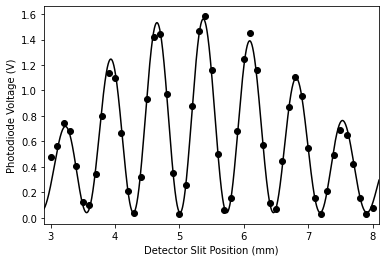

In [9]:
plt.scatter(x, V, color='k')
p = opt.curve_fit(double, x, V)[0]
X = np.linspace(2.9, 8.1, 10000)
plt.plot(X, double(X, *p), 'k')
plt.xlim(2.9,8.1)
plt.xlabel('Detector Slit Position (mm)')
plt.ylabel('Photodiode Voltage (V)')
plt.savefig('laser_young')
print(p)

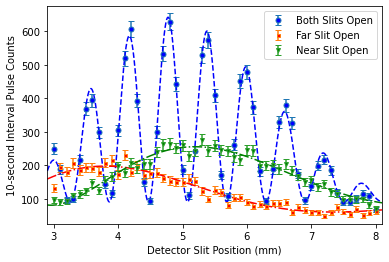

In [10]:
plt.errorbar(x, BO, yerr=np.sqrt(BO), ls='', capsize=3, marker='o', markerfacecolor='b', markersize=5, label='Both Slits Open')
p2 = opt.curve_fit(double, x, BO)[0]
plt.plot(X, double(X, *p2), 'b--')
plt.errorbar(x, FSO, yerr=np.sqrt(FSO), ls='', capsize=3, marker='s', markerfacecolor='r', markersize=3, label='Far Slit Open')
p3 = opt.curve_fit(single2, x, FSO)[0]
plt.plot(X, single2(X, *p3), 'r-.')
plt.errorbar(x, NSO, yerr=np.sqrt(NSO), ls='', capsize=3, marker='v', markerfacecolor='g', markersize=4, label='Near Slit Open')
p4 = opt.curve_fit(single, x, NSO)[0]
plt.plot(X, single(X, *p4), 'g-.')
plt.legend()
plt.xlim(2.9, 8.1)
plt.ylim(25,675)
plt.xlabel('Detector Slit Position (mm)')
plt.ylabel('10-second Interval Pulse Counts')
plt.savefig('bulb_young')

[ 5.06471872e+01  5.15014673e+00  3.73622129e+00 -1.44410552e+01
  2.68525664e+01  4.00284672e-02]
(array([18], dtype=int64),)
4.8
(array([24], dtype=int64),)
5.4


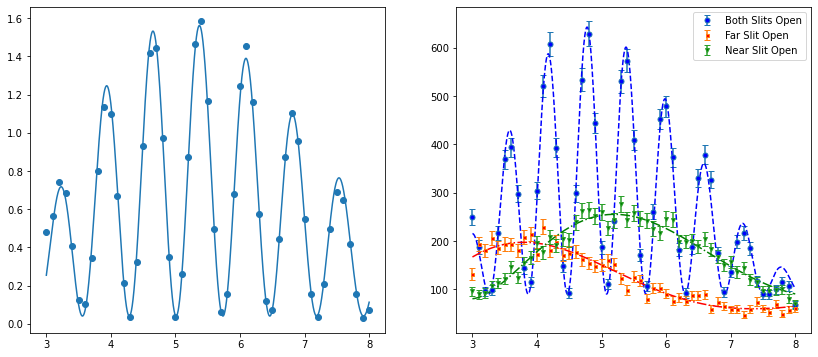

In [11]:
fig1 = plt.figure(figsize=(14, 6))

ax1 = fig1.add_subplot(121)
ax1.scatter(x, V)
p = opt.curve_fit(double, x, V)[0]
X = np.linspace(3, 8, 10000)
ax1.plot(X, double(X, *p))
print(p)

ax2 = fig1.add_subplot(122)
ax2.errorbar(x, BO, yerr=np.sqrt(BO), ls='', capsize=3, marker='o', markerfacecolor='b', markersize=5, label='Both Slits Open')
p2 = opt.curve_fit(double, x, BO)[0]
ax2.plot(X, double(X, *p2), 'b--')
ax2.errorbar(x, FSO, yerr=np.sqrt(FSO), ls='', capsize=3, marker='s', markerfacecolor='r', markersize=3, label='Far Slit Open')
p3 = opt.curve_fit(single2, x, FSO)[0]
ax2.plot(X, single2(X, *p3), 'r-.')
ax2.errorbar(x, NSO, yerr=np.sqrt(NSO), ls='', capsize=3, marker='v', markerfacecolor='g', markersize=4, label='Near Slit Open')
p4 = opt.curve_fit(single, x, NSO)[0]
ax2.plot(X, single(X, *p4), 'g-.')
ax2.legend();
print(np.where(BO ==np.max(BO)))
print(x[18])
print(np.where(V ==np.max(V)))
print(x[24])

In [12]:
X = np.linspace(-10, 10, 1000)
plt.plot(X, sinc(X, *p))

NameError: name 'sinc' is not defined

In [24]:
interval_data = pd.read_csv(r"C:\Users\nbw36\Downloads\PCIT.intervaldata.csv")

In [25]:
interval = interval_data['Interval time (ms)']

In [26]:
def decay(t, lam, A):
    return A*np.exp(-lam*t)

[ 74.90716342 336.29971994] [[ 3.46728647  8.05296606]
 [ 8.05296606 35.5706965 ]]
13847.575670498085 14022.919545771689
49.83688419846855


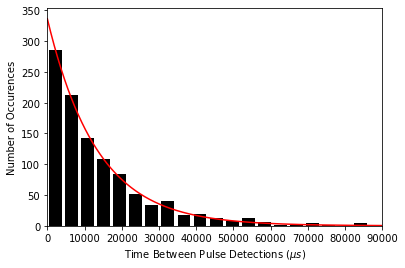

In [31]:
y = plt.hist(interval, bins=20, rwidth=0.8)[0]
x = (plt.hist(interval, bins=20, rwidth=0.8)[1][0:-1] + 2160.4725) * 10**-6
p, c = opt.curve_fit(decay, x, y)

XX = np.linspace(0, 90000, 10000)

plt.hist(interval, bins=20, color='k', rwidth = 0.8)
plt.plot(XX, decay(XX*10**-6, *p), 'r')
plt.xlim(0, 90000)
plt.xlabel('Time Between Pulse Detections ($\mu s$)')
plt.ylabel('Number of Occurences');
plt.savefig('Interval Timing', dpi=300)
print(p, c)
print(np.mean(interval), np.std(interval))
print(np.mean(decay(XX*10**-6, *p)))